In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('.\Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [27]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


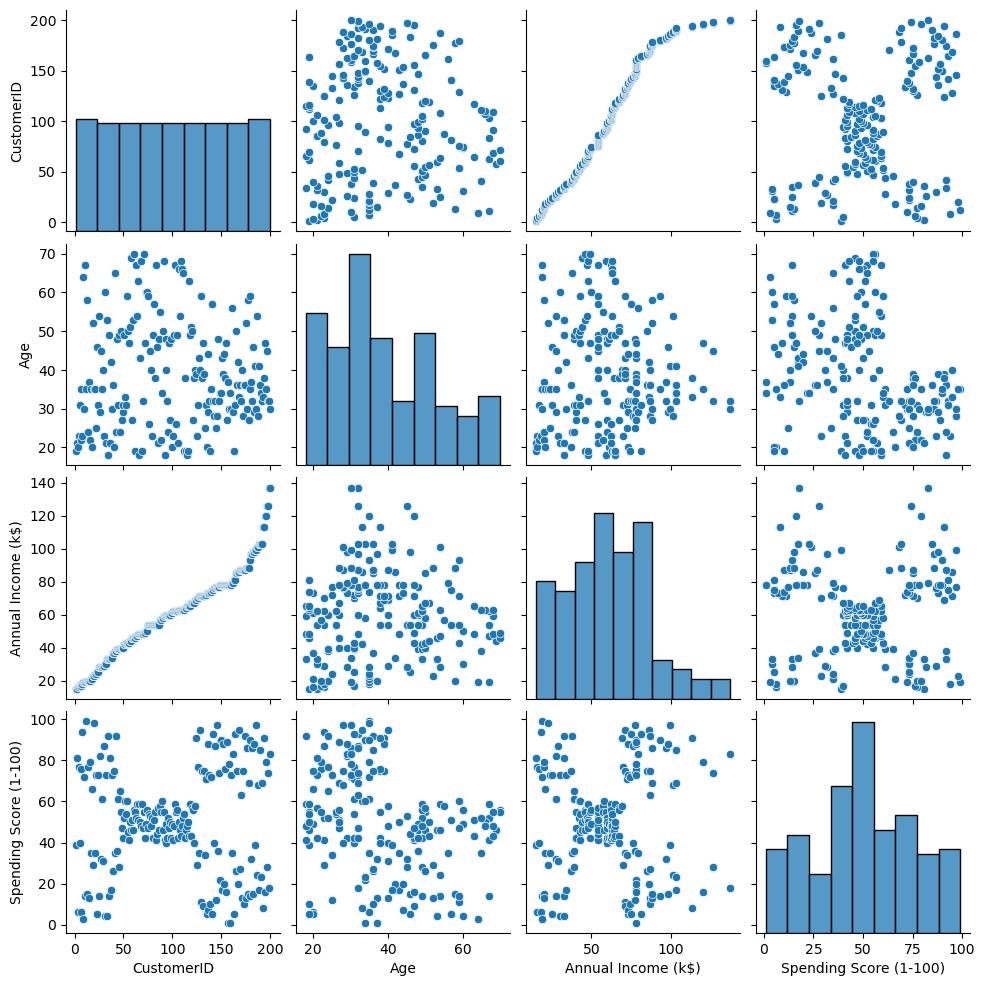

In [28]:
sns.pairplot(dataset)
plt.show()

In [29]:
means = dataset.select_dtypes(include=[np.number]).mean()

In [30]:

dataset.fillna(means, inplace=True)

In [31]:
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

In [32]:
print(dataset.describe())

       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [34]:
print(dataset.describe())

       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


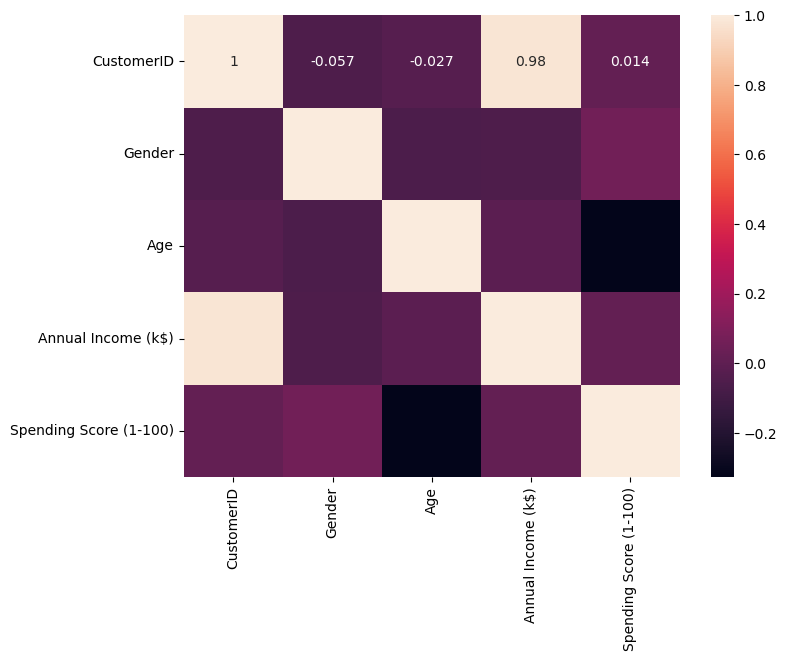

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

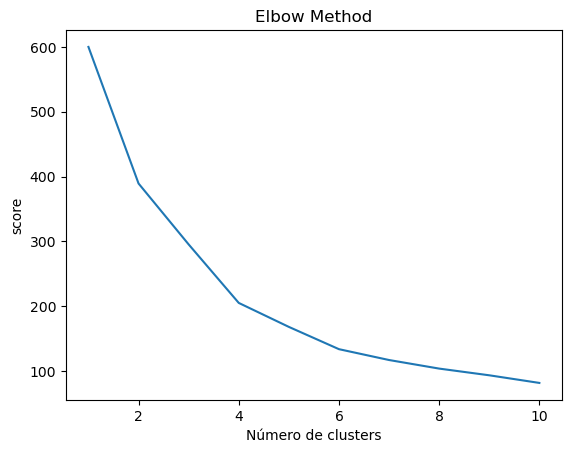

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('score')
plt.show()

# Asumamos que el número óptimo de clusters es 3
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data_scaled)
dataset['Cluster'] = clusters

In [37]:
print('Silhouette Score:', silhouette_score(data_scaled, clusters))

# Calinski-Harabasz Index
print('Calinski-Harabasz Index:', calinski_harabasz_score(data_scaled, clusters))

Silhouette Score: 0.41664341513732767
Calinski-Harabasz Index: 125.10094020060953


In [38]:
print(dataset.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


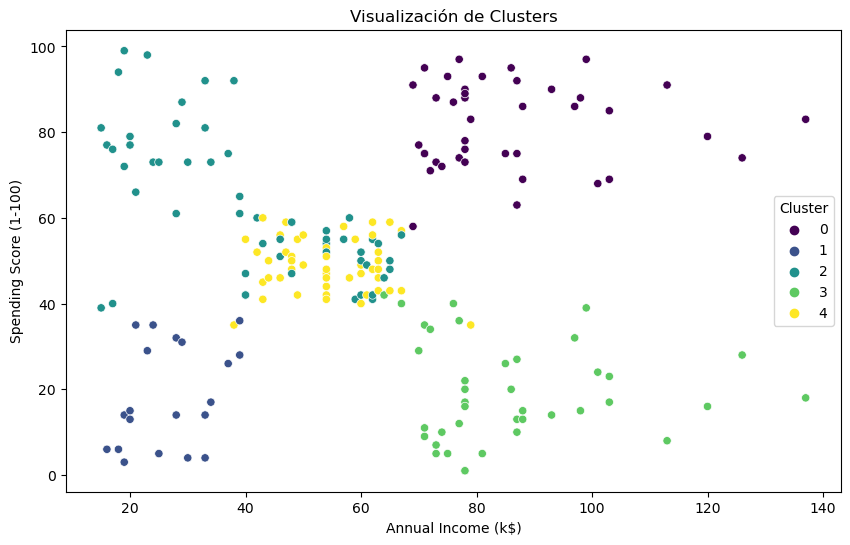

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Visualización de Clusters')
plt.show()

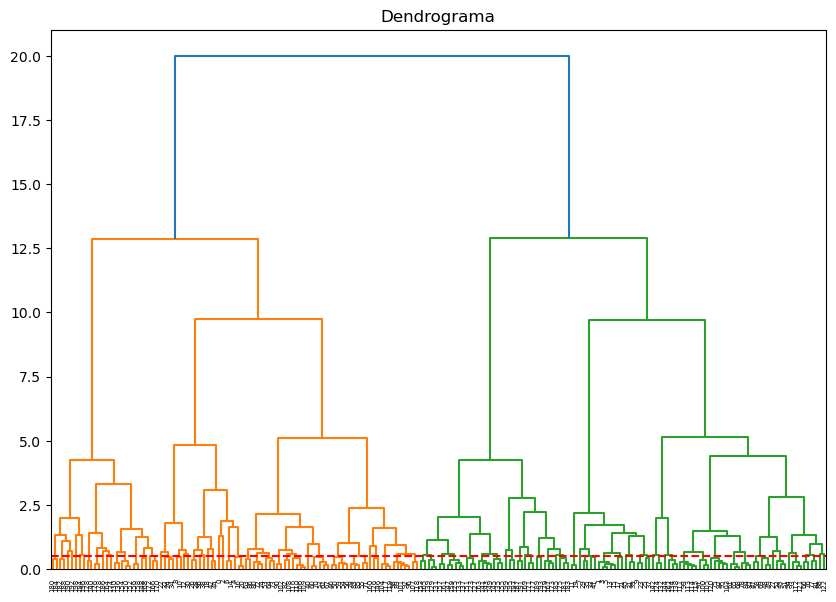

In [40]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

In [41]:
k = 5
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data_scaled)

# se añaden las etiquetas de cluster al DataFrame original para visualización
dataset['Cluster_Hierarchical'] = cluster_labels

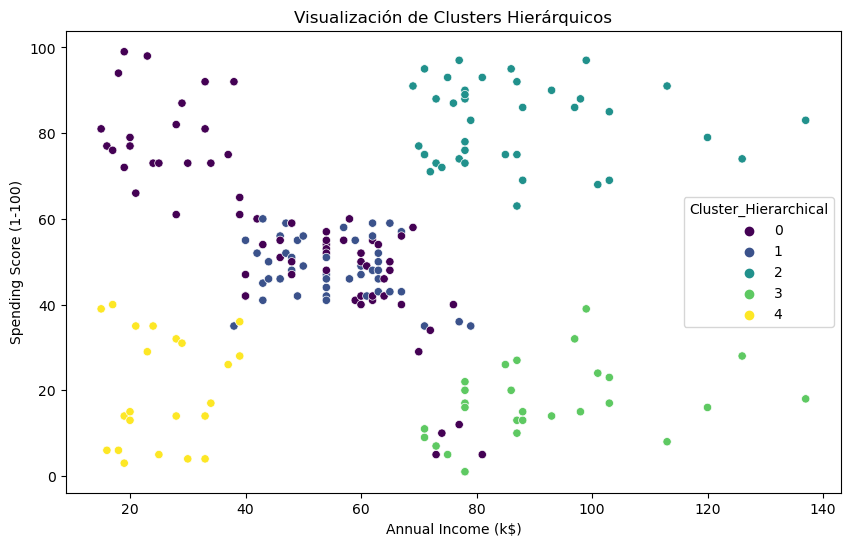

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical', palette='viridis')
plt.title('Visualización de Clusters Hierárquicos')
plt.show()

In [43]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Calcular las distancias
x = pdist(X)

# Calcular la matriz de enlace
Z = linkage(X, 'ward')

# Calcular el coeficiente de correlación cofenética
coef_cofenetico, coph_dists = cophenet(Z, x)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: 0.7179298392392908
